In [2]:
using DifferentialEquations
using Plots

$$
\ddot{y} = -g - b\dot{y}^\gamma\\
\ddot{x} = - b\dot{x}^\gamma
$$

In [171]:
function eqm!(du,u,p,t)
    g,b,γ = p
    vx = u[3]
    vy = u[4]
    du[1] = vx
    du[2] = vy
    du[3] = - b * vx * abs(vx)^(γ-1)
    du[4] = - g - b * vy * abs(vy)^(γ-1)
end

u0 = [0.0,100.0,30.0,40.0] #(x0,y0,vx0,vy0)
ts = (0.0,30.0)
p = (9.8,0.18,1.0)

# bounce at y = 0
condition(u,t,integrator) = u[2]
function affect!(integrator)
    integrator.u[4] = -0.8integrator.u[4]
end
cb = ContinuousCallback(condition,affect!)

prob = ODEProblem(eqm!,u0,ts,p,callback=cb)

@time sol = solve(prob,Tsit5());

  2.452441 seconds (4.78 M allocations: 218.202 MiB, 2.09% gc time)


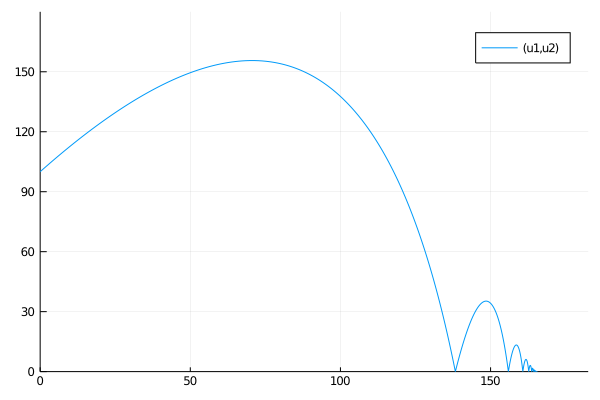

In [172]:
plot(sol,vars=(1,2),ylims=(0,180))